In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


# Create a directory to save images if it doesn't exist

# Load the dataset
file_path = 'data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'
data = pd.read_csv(file_path)

# Step 1: Dropping irrelevant columns
columns_to_drop = ['Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 
                   'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID', 
                   'StratificationCategoryId1', 'StratificationID1', 'GeoLocation', 'Data_Value_Alt', 'Datasource', 'LocationAbbr']

# Get the number of rows (records) in the file
number_of_records = data.shape[0]
print(f"\nThe file contains {number_of_records} records.\n")

# Drop irrelevant columns
cleaned_data = data.drop(columns=columns_to_drop)

# Step 2: Filtering the data to only include records related to obesity
# We are focusing on rows where the 'Class' column is related to "Obesity / Weight Status"
cleaned_data = cleaned_data[cleaned_data['Class'] == 'Obesity / Weight Status']

# Optional: Print out how many records are related to obesity
number_of_obesity_records = cleaned_data.shape[0]
print(f"\nThe dataset contains {number_of_obesity_records} records related to obesity.\n")

# Drop the 'Class' column since it's no longer needed after filtering
cleaned_data = cleaned_data.drop(columns=['Class'])

# Step 3: Checking for missing values before cleaning
missing_values = cleaned_data.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

# Step 4: Filling missing values in categorical columns with mode
categorical_cols = ['Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity']

for col in categorical_cols:
    cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].mode()[0])

# Step 5: Dropping rows with missing Data_Value (target variable)
cleaned_data = cleaned_data.dropna(subset=['Data_Value'])

# Step 6: Checking for missing values after cleaning
missing_values_after = cleaned_data.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after)

# Optional: Checking the structure of the cleaned data
print("\nCleaned Data Information:\n")
print(cleaned_data.info())


The file contains 93249 records.


The dataset contains 36234 records related to obesity.

Missing values before cleaning:
 YearStart                      0
YearEnd                        0
LocationDesc                   0
Topic                          0
Question                       0
Data_Value_Type                0
Data_Value                  3554
Low_Confidence_Limit        3554
High_Confidence_Limit       3554
Sample_Size                 3554
Total                      34940
Age(years)                 28470
Education                  31058
Gender                     33646
Income                     27176
Race/Ethnicity             25882
StratificationCategory1        2
Stratification1                2
dtype: int64

Missing values after cleaning:
 YearStart                      0
YearEnd                        0
LocationDesc                   0
Topic                          0
Question                       0
Data_Value_Type                0
Data_Value                     0
Low_

Images saved in folder: images/


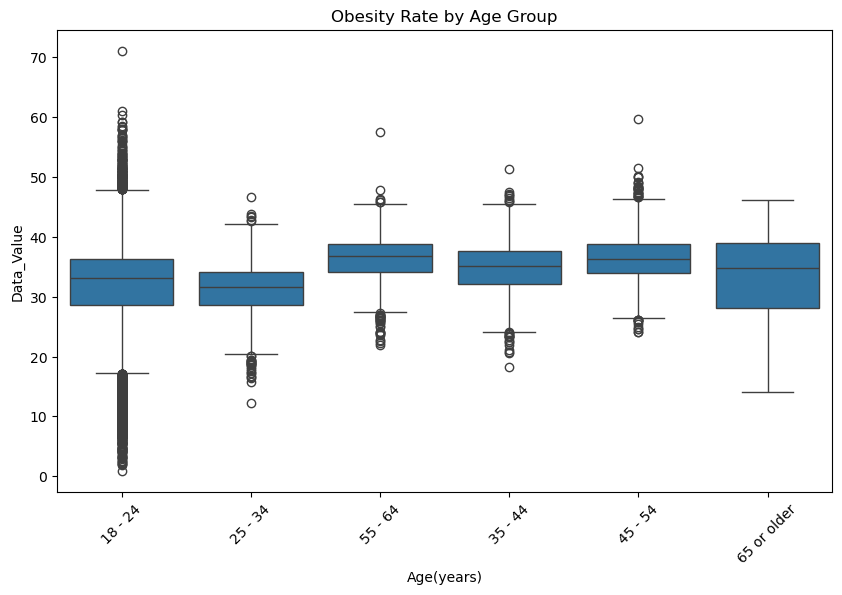

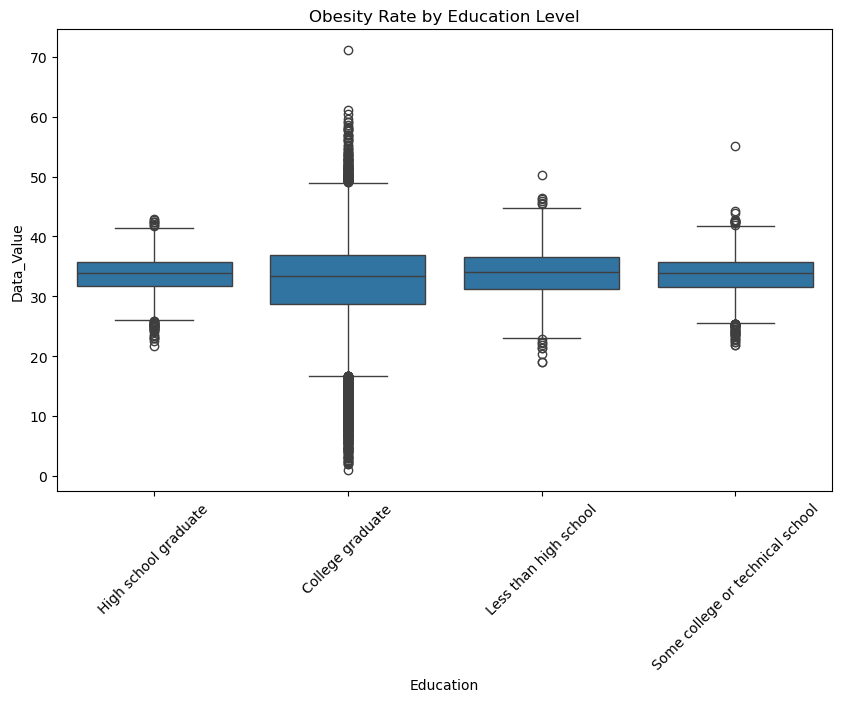

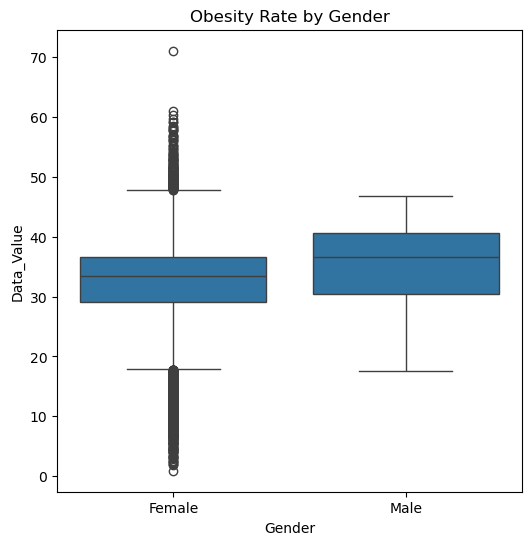

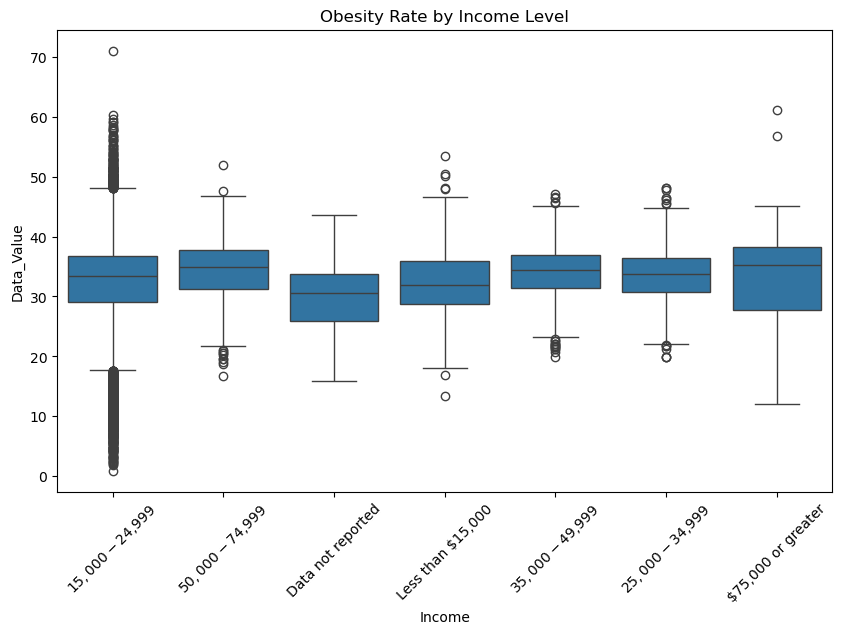

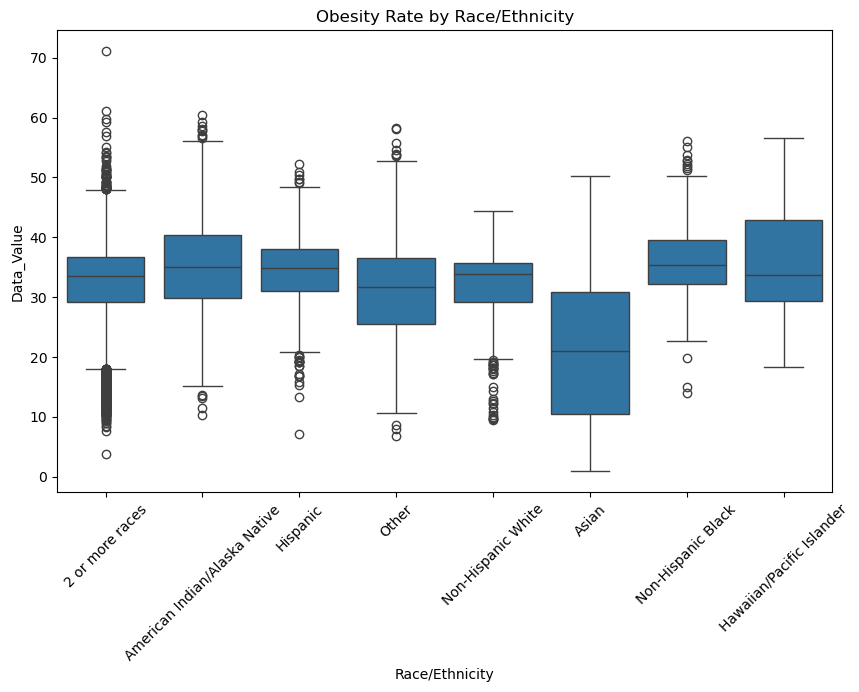

In [2]:
# Define the folder path where images will be saved
save_path = "images/"

# Obesity by Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='Age(years)', y='Data_Value')
plt.title('Obesity Rate by Age Group')
plt.xticks(rotation=45)
plt.savefig(f"{save_path}obesity_by_age.png")

# Obesity by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='Education', y='Data_Value')
plt.title('Obesity Rate by Education Level')
plt.xticks(rotation=45)
plt.savefig(f"{save_path}obesity_by_education.png")

# Obesity by Gender
plt.figure(figsize=(6, 6))
sns.boxplot(data=cleaned_data, x='Gender', y='Data_Value')
plt.title('Obesity Rate by Gender')
plt.savefig(f"{save_path}obesity_by_gender.png")

# Obesity by Income Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='Income', y='Data_Value')
plt.title('Obesity Rate by Income Level')
plt.xticks(rotation=45)
plt.savefig(f"{save_path}obesity_by_income.png")

# Obesity by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='Race/Ethnicity', y='Data_Value')
plt.title('Obesity Rate by Race/Ethnicity')
plt.xticks(rotation=45)
plt.savefig(f"{save_path}obesity_by_race_ethnicity.png")

print(f"Images saved in folder: {save_path}")



Logistic Regression Results:
Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2807
           1       0.71      1.00      0.83      6997

    accuracy                           0.71      9804
   macro avg       0.36      0.50      0.42      9804
weighted avg       0.51      0.71      0.59      9804


Logistic Regression Coefficients:
           Feature  Coefficient
0      Age(years)     0.361122
1       Education     0.339682
4  Race/Ethnicity     0.150583
2          Gender     0.150045
5    LocationDesc     0.078385
3          Income     0.063388

Decision Tree Results:
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.32      0.39      2807
           1       0.76      0.87      0.81      6997

    accuracy                           0.71      9804
   macro avg       0.63      0.60      0.60      9804
weighted avg

C:\Users\H304957\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\H304957\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\H304957\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Support Vector Machine (SVM) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2807
           1       0.71      1.00      0.83      6997

    accuracy                           0.71      9804
   macro avg       0.36      0.50      0.42      9804
weighted avg       0.51      0.71      0.59      9804


Support Vector Machine (SVM) Coefficients:
           Feature  Coefficient
1       Education     0.000012
0      Age(years)    -0.000021
5    LocationDesc    -0.000025
2          Gender    -0.000148
3          Income    -0.000178
4  Race/Ethnicity    -0.000185

K-Nearest Neighbors (KNN) Results:


C:\Users\H304957\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\H304957\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\H304957\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

K-Nearest Neighbors (KNN) Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.34      0.40      2807
           1       0.76      0.85      0.80      6997

    accuracy                           0.70      9804
   macro avg       0.62      0.59      0.60      9804
weighted avg       0.68      0.70      0.69      9804


Linear Regression Results:

Linear Regression Coefficients:
           Feature  Coefficient
0      Age(years)     1.386340
2          Gender     0.877367
1       Education     0.774349
4  Race/Ethnicity     0.601495
3          Income     0.479649
5    LocationDesc     0.275356
Linear Regression R-squared Score: 0.04795883815430879


<Figure size 1000x600 with 0 Axes>

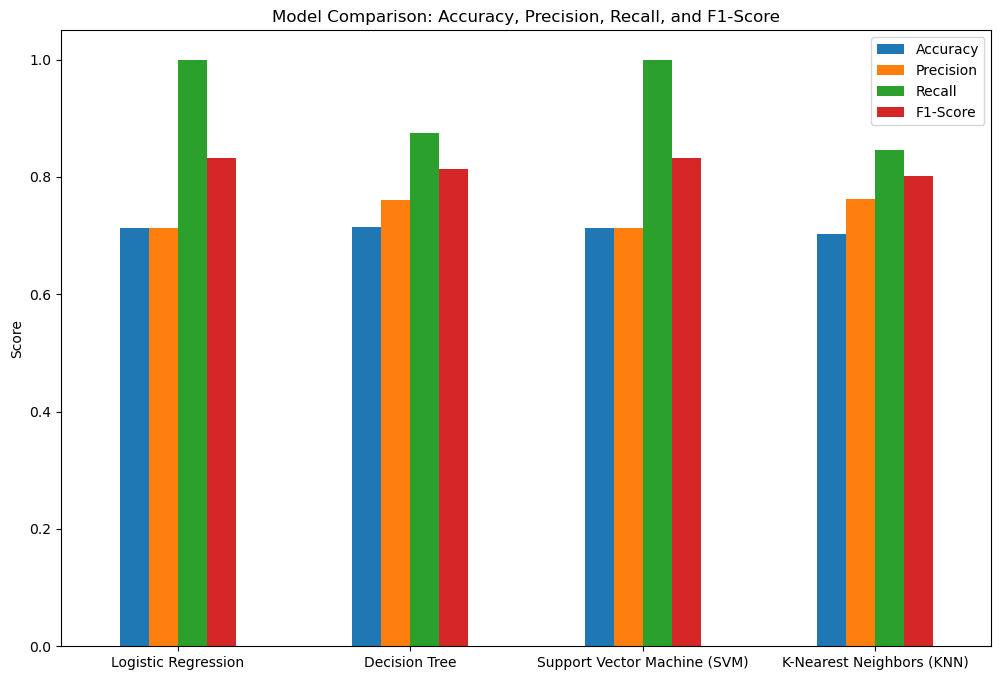

Images saved in folder: images/


In [3]:

# Create a directory to save images if it doesn't exist
save_path = 'images/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Selecting the feature columns (assuming these are in your dataset)
features = ['Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'LocationDesc']

# Creating binary target variable 'Obese' (1 for obese, 0 for not obese)
cleaned_data['Obese'] = cleaned_data['Data_Value'].apply(lambda x: 1 if x >= 30 else 0)

# Encoding categorical variables
label_encoders = {}
for col in features:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    label_encoders[col] = le

# Splitting the data into features (X) and target (y)
X = cleaned_data[features]
y = cleaned_data['Obese']  # Binary target for classification

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Dictionary to store model performance metrics
model_metrics = {}

# Function to evaluate accuracy, precision, recall, F1-score and store in the dictionary
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in the dictionary
    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Print classification report
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    # Return trained model for further analysis
    return model

# Logistic Regression: Evaluate and extract coefficients
print("\nLogistic Regression Results:")
log_reg = LogisticRegression()  # Instantiate the logistic regression model
log_reg_trained = evaluate_model(log_reg, "Logistic Regression")

# Extract and display coefficients for Logistic Regression
log_reg_coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg_trained.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("\nLogistic Regression Coefficients:\n", log_reg_coef)

# Decision Tree Classifier: Evaluate and extract feature importances
print("\nDecision Tree Results:")
decision_tree = DecisionTreeClassifier()  # Instantiate the decision tree model
decision_tree_trained = evaluate_model(decision_tree, "Decision Tree")

# Extract and display feature importances for Decision Tree
tree_importance = pd.DataFrame({
    'Feature': features,
    'Importance': decision_tree_trained.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nDecision Tree Feature Importance:\n", tree_importance)

# Support Vector Machine (SVM): Evaluate and extract coefficients
print("\nSupport Vector Machine (SVM) Results:")
svm = SVC(kernel='linear')  # Instantiate the SVM model with a linear kernel
svm_trained = evaluate_model(svm, "Support Vector Machine (SVM)")

# Extract and display coefficients for SVM
svm_coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': svm_trained.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("\nSupport Vector Machine (SVM) Coefficients:\n", svm_coef)

# K-Nearest Neighbors (KNN): Evaluate accuracy (no feature importances for KNN)
print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)  # Instantiate the KNN model with 5 neighbors
evaluate_model(knn, "K-Nearest Neighbors (KNN)")

# Linear Regression: Predict continuous obesity rates (Data_Value)
y_continuous = cleaned_data['Data_Value']  # Using the continuous 'Data_Value' as target

# Train-test split for linear regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_continuous, test_size=0.3, random_state=42)

print("\nLinear Regression Results:")
linear_reg = LinearRegression()  # Instantiate the linear regression model
linear_reg.fit(X_train_reg, y_train_reg)

# Extract and display coefficients for Linear Regression
linear_reg_coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': linear_reg.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nLinear Regression Coefficients:\n", linear_reg_coef)

# Make predictions on test set and evaluate
y_pred_reg = linear_reg.predict(X_test_reg)
print(f"Linear Regression R-squared Score: {linear_reg.score(X_test_reg, y_test_reg)}")

# Plotting the metrics for each classification model
metrics_df = pd.DataFrame(model_metrics).T  # Convert dictionary to DataFrame

# Plotting the metrics using seaborn
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison: Accuracy, Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.savefig(f"{save_path}model_comparison.png")  # Save the metrics bar plot
plt.show()

print(f"Images saved in folder: {save_path}")



Default Decision Tree Results:


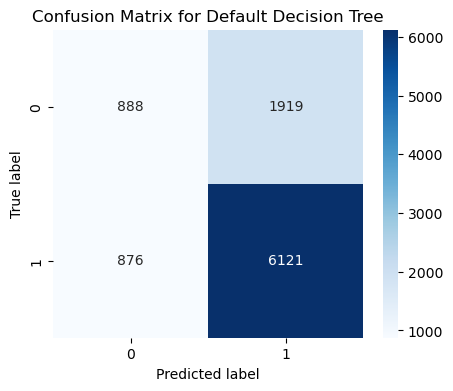


Default Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.32      0.39      2807
           1       0.76      0.87      0.81      6997

    accuracy                           0.71      9804
   macro avg       0.63      0.60      0.60      9804
weighted avg       0.69      0.71      0.69      9804


Feature Importance for Default Decision Tree:

          Feature  Importance
5    LocationDesc    0.450676
4  Race/Ethnicity    0.166067
0      Age(years)    0.143577
3          Income    0.106697
1       Education    0.099162
2          Gender    0.033821

Tuned Decision Tree Results:


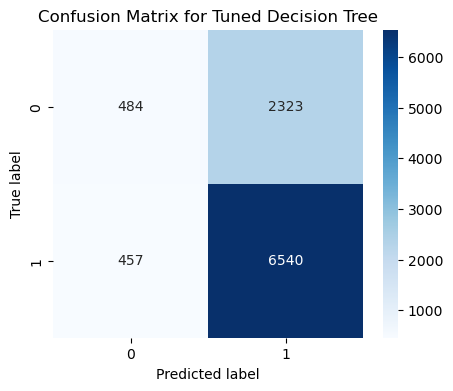


Tuned Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.17      0.26      2807
           1       0.74      0.93      0.82      6997

    accuracy                           0.72      9804
   macro avg       0.63      0.55      0.54      9804
weighted avg       0.67      0.72      0.66      9804


Feature Importance for Tuned Decision Tree:

          Feature  Importance
5    LocationDesc    0.306925
4  Race/Ethnicity    0.212751
0      Age(years)    0.184703
3          Income    0.125942
1       Education    0.125774
2          Gender    0.043906

Comparison of Feature Importance Before and After Tuning:
          Feature  Importance_Before  Importance_After
0    LocationDesc           0.450676          0.306925
1  Race/Ethnicity           0.166067          0.212751
2      Age(years)           0.143577          0.184703
3          Income           0.106697          0.125942
4       Education           0.099162  

<Figure size 1000x600 with 0 Axes>

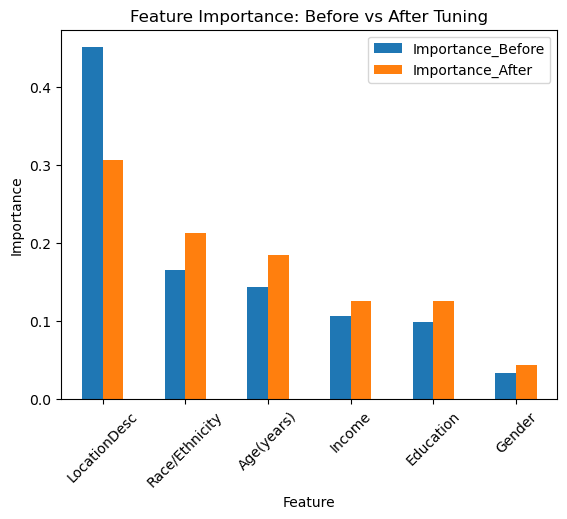

<Figure size 800x500 with 0 Axes>

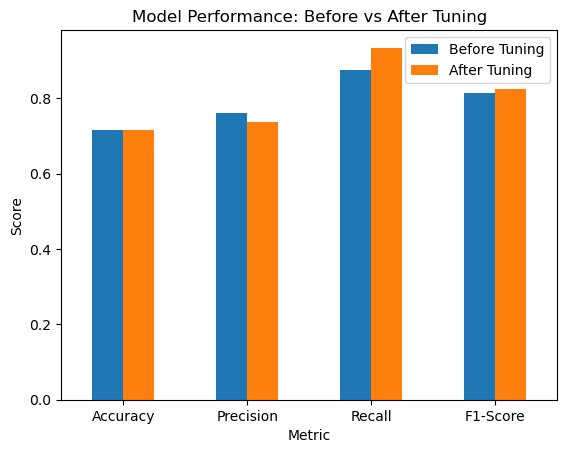

Images saved in folder: images/


In [4]:

save_path = 'images/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Function to evaluate and display the confusion matrix and classification report
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f"{save_path}confusion_matrix_{model_name}.png")  # Save the confusion matrix image
    plt.show()
    
    # Classification report and other metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Return trained model for further analysis and the calculated metrics
    return model, accuracy, precision, recall, f1

# Function to display feature importances
def display_feature_importance(model, model_name):
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\nFeature Importance for {model_name}:\n")
    print(importance_df)
    return importance_df

# Before tuning - Default Decision Tree
print("\nDefault Decision Tree Results:")
decision_tree_default = DecisionTreeClassifier()
model_default, acc_before, prec_before, rec_before, f1_before = evaluate_model(decision_tree_default, "Default Decision Tree")

# Display feature importance before tuning
importance_default = display_feature_importance(model_default, "Default Decision Tree")

# Decision Tree - Tuning
print("\nTuned Decision Tree Results:")
decision_tree_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
decision_tree_tuned = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, cv=5, scoring='accuracy')
model_tuned, acc_after, prec_after, rec_after, f1_after = evaluate_model(decision_tree_tuned, "Tuned Decision Tree")

# Get the best estimator from GridSearchCV (the tuned model)
best_decision_tree = model_tuned.best_estimator_

# Display feature importance after tuning
importance_tuned = display_feature_importance(best_decision_tree, "Tuned Decision Tree")

# Compare feature importance before and after tuning
print("\nComparison of Feature Importance Before and After Tuning:")
comparison_df = pd.merge(importance_default, importance_tuned, on='Feature', suffixes=('_Before', '_After'))
print(comparison_df)

# 1. Bar Graph for Feature Importance Comparison Before vs After Tuning
plt.figure(figsize=(10, 6))
comparison_df.set_index('Feature')[['Importance_Before', 'Importance_After']].plot(kind='bar')
plt.title('Feature Importance: Before vs After Tuning')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.savefig(f"{save_path}feature_importance_comparison.png")  # Save feature importance comparison image
plt.show()

# 2. Bar Graph for Model Performance Metrics Before vs After Tuning
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Before Tuning': [acc_before, prec_before, rec_before, f1_before],
    'After Tuning': [acc_after, prec_after, rec_after, f1_after]
})

plt.figure(figsize=(8, 5))
performance_comparison.set_index('Metric').plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Model Performance: Before vs After Tuning')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.savefig(f"{save_path}model_performance_comparison.png")  # Save model performance comparison image
plt.show()

print(f"Images saved in folder: {save_path}")
